# TP2: Clase 3

In [242]:
# Se importan las librerias a utilizar
import os
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage, misc

module_path = os.path.abspath(os.path.join('../../utils'))
sys.path.append(module_path)

from image_utils import convert_RGB



In [243]:
def convert_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

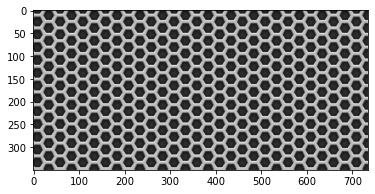

In [303]:
# Se carga la imagen
img = cv.imread('tp2_images/metalgrid.jpg')
img = convert_gray(img)
plt.imshow(img)

1- Calcule los gradientes en la imagen (dirección y módulo)

Blur image


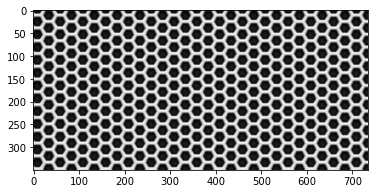

In [90]:
# Filtramos la imagen 
img_blur = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=0)
print("Blur image")
plt.imshow(img_blur)


In [197]:
def sobel_filter(img, dx=1, dy=0, ksize=3):
    img_sobel_32 = cv.Sobel(img_blur, ddepth=cv.CV_32F, dx=dx , dy=dy, ksize=ksize)
    abs_32 = np.absolute(img_sobel_32)
    img_sobel_8 = np.uint8(abs_32 / abs_32.max() * 255)
    return img_sobel_8, img_sobel_32

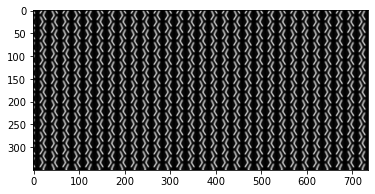

In [198]:
# Se aplica el filtro de sobel en x
img_sobelx, img_sobelx_32 = sobel_filter(img_blur, dx=1, dy=0)
plt.imshow(img_sobelx)

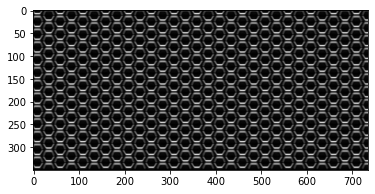

In [199]:
# Se aplica el filtro de sobel en y
img_sobely, img_sobely_32 = sobel_filter(img_blur, dx=0, dy=1)
plt.imshow(img_sobely)

In [200]:
# Calculamos a partir de los gradientes la magnitud
magnitude = np.hypot(img_sobelx, img_sobely)
magnitude = magnitude / magnitude.max() * 255
magnitude = np.uint8(magnitude)

In [211]:
# Calculamos la direccion
theta = np.arctan2(img_sobely_32, img_sobelx_32)
angle = np.rad2deg(theta)

2- Muestre imágenes de ángulo y módulo

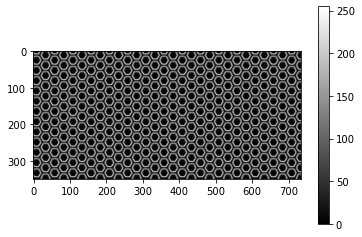

In [216]:
# Magnitud
plt.imshow(magnitude)
plt.colorbar()


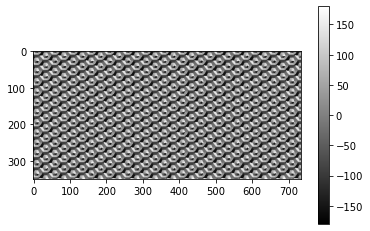

In [215]:
# Angulo
plt.imshow(angle)
plt.colorbar()

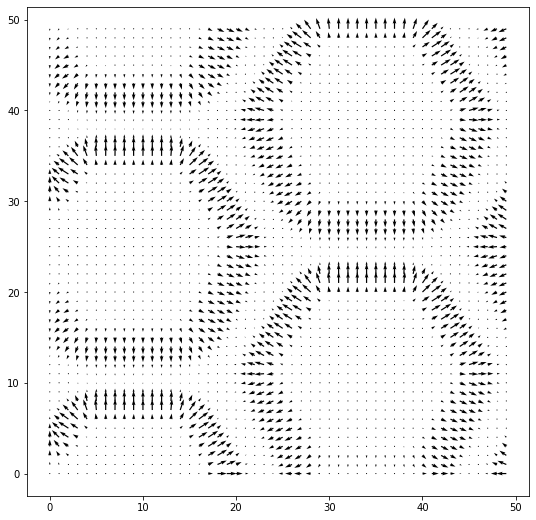

In [209]:
# Se grafican los gradientes
x = np.arange(img_blur.shape[0])
y = np.arange(img_blur.shape[1])
fig, ax = plt.subplots(figsize=(9, 9))
X, Y = np.meshgrid(x, y)
# Se define un zoom para visualizar los 
zoom = 50
U = magnitude[:zoom, :zoom] * np.cos(theta)[:zoom, :zoom]
V = magnitude[:zoom, :zoom] * np.sin(theta)[:zoom, :zoom]
ax.quiver(X[:zoom, :zoom], Y[:zoom, :zoom], U, V, scale=10000)

plt.show()

3- Marque con color las direcciones de gradientes más altos

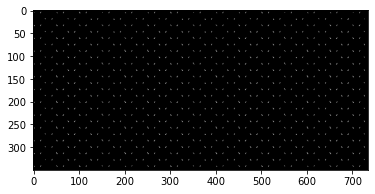

In [253]:
# Obtienen los valores de gradientes mas altos
percentile_val = 99
percentile = np.percentile(magnitude, percentile_val)
plt.imshow(magnitude > percentile)

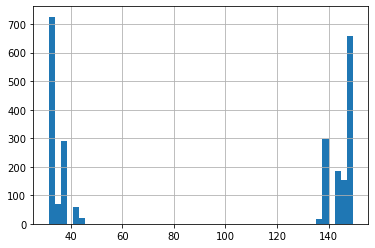

In [322]:

bins = 50
max_num = 2

plt.hist(angle[magnitude > percentile], bins=bins)
plt.grid()

In [339]:
hist = np.histogram(angle[magnitude > percentile], bins=bins)
max_index = np.argsort(hist[0])[-max_num:]
max_angles = hist[1][max_index]

print(max_angles)
max_angles = [np.pi / 180 * ang for ang in max_angles]

[147.08902   31.385817]


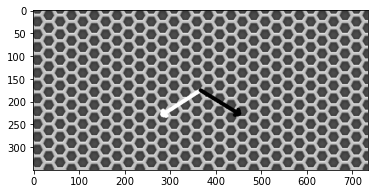

In [347]:
init_y = int(img.shape[1] / 2)
init_x = int(img.shape[0] / 2)

img_arrows = cv.arrowedLine(
    img.copy(), 
    (init_y, init_x),
    (int(init_y + 100 * np.cos(max_angles[0])), init_x + int(100 * np.sin(max_angles[0]))),
    (255),
    7
)
img_arrows = cv.arrowedLine(
    img_arrows.copy(),
    (init_y, init_x),
    (init_y + int(100 * np.cos(max_angles[1])),  init_x + int(100 * np.sin(max_angles[1]))),
    (0),
    7
)
plt.imshow(img_arrows)